## Exercise 1

### LogisticRegression without regularization

❓ Rank the features in decreasing order of importance according to a simple **non-regularized** Logistic Regression

- Careful, `LogisticRegression` is penalized by default. Check the doc for the appropriate 'penalty' hyperparameter!
- Increase `max_iter` to a larger number until the model converges (>1000)
- Train the model on X and y, then extract the coefficients of the trained model
    - Remember that you can access the coefficients of the regression by calling `.coef_` on your trained model. 
- **Hint**: it might help to put the coefficient of the model in a dataframe with column names from `X` to be able to interpret them. Also check the `transpose()` and `sort_values()` pandas functions

In [1]:
# Your Code here
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("Data/biodiversity-prepared.csv")

# Split into X and y
X = data.drop(columns="RCACScore")
y = data["RCACScore"]

# Instantiate LogisticRegression model with the appropriate parameters
logreg = LogisticRegression(penalty = None, max_iter = 1000)

# Fit the model to the dataset
logreg.fit(X, y)

# Create a dataframe from the coefficients
coefficients = pd.DataFrame(logreg.coef_, columns = X.columns, index = ['Coefficients'])

# Sort the data appropriately - remember, it is the MAGNITUDE of the data (regardless of sign) that tells you how 
# important a feature is
coefficients = coefficients.T.sort_values(by = 'Coefficients', key = abs, ascending = False)

coefficients.head()

,Coefficients
RCACRareSp,35.716848
in,-17.987744
RCACGround,17.380507
ei,-9.651201
h,5.028017


❓How do you interpret, in plain English, the value for the coefficient assigned to `RCACRareSp` ?

<details>
    <summary>Answer</summary>

All things being equal (i.e. if the other variables are the same), the abundance of rare species (`RCACRareSp`) increases the log-odds of the site being classified as important by 35.7 (your coef value). In terms of raw odds, a high `RCACRareSp` increases the odds-ratio of a high score by exp(35.7) = 3.19E15

</details>

❓ What are the 5 features that have the greatest impact on the classification of a site as a high scoring site? Assign your answer to a variable named `base_most_important`.

In [2]:
# Extract the index of the 5 rows with the highest coefficients
base_most_important = coefficients.head().index.to_list()

base_most_important

['RCACRareSp', 'in', 'RCACGround', 'ei', 'h']

❓ Now cross validate a model (check the `sklearn` `cross_validate` class) with the same parameters as the model above, and save the mean score under a variable named `base_model_score`. I recommend using 5-fold cross validation.

In [3]:
from sklearn.model_selection import cross_validate

# Run the cross validation with cv = 5
# This returns a dictionary
score_dict = cross_validate(logreg, X, y, cv = 5)

# The 'test_score' key contains an array of test scores, so find the mean of that array to get base_model_score
base_model_score = score_dict['test_score'].mean()

base_model_score

0.8996421548452005

## Exercise 1.2

### Logistic Regression with a L2 penalty

Let's use a **Logistic model** whose log-loss has been penalized with an **L2** term to determine out the **most important features** without overfitting.

The L2 penalty is the classification problem equivalent to the "Ridge" regressor

❓ Instantiate a **strongly regularized** `LogisticRegression` and rank its feature importance. By "strongly regularized", I am referring to setting the value of the regularization parameter, `C`. The value of `C` is inversely proportional to the strength of the regularization (i.e., smaller values are stronger). 
- sklearn's values default values are generally good for scaled features; generally, when tuning the value of C, you vary its value by orders of magnitude.
- In this case, I recommend a regularization factor of 10% of the default value.

In [4]:
l2_logreg = LogisticRegression(penalty = 'l2', C = 0.1)

# Fit the model to the dataset
l2_logreg.fit(X, y)

# Create a dataframe from the coefficients
regularized_coefficients = pd.DataFrame(l2_logreg.coef_, columns = X.columns, index = ['Coefficients'])

# Sort the data appropriately - remember, it is the MAGNITUDE of the data (regardless of sign) that tells you how 
# important a feature is
regularized_coefficients = regularized_coefficients.T.sort_values(by = 'Coefficients', key = abs, ascending = False)

# You'll notice that the coefficients of the regularized model are much smaller!
regularized_coefficients.head()

,Coefficients
RCACRareSp,4.271451
Weeds,1.970955
RCACRegene,1.402580
RCACLogs,1.331928
RCACGrassl,0.641148


❓ What are the top 5 features according to LogisticRegression strongly regularized by an L2 penalty? Assign them to a variable named `l2_most_important`. Are these the same features as `base_most_important`?

In [5]:
# Extract the index of the 5 rows with the highest coefficients
l2_most_important = regularized_coefficients.head().index.to_list()

l2_most_important

['RCACRareSp', 'Weeds', 'RCACRegene', 'RCACLogs', 'RCACGrassl']

❓ Now cross validate a model with the same parameters as the model above, and save the mean score under a variable named `l2_model_score`. What can you say about the new score compared to the `base_model_score`?

In [6]:
# Run the cross validation with cv = 5
# This returns a dictionary
score_dict = cross_validate(l2_logreg, X, y, cv = 5)

# The 'test_score' key contains an array of test scores, so find the mean of that array to get base_model_score
l2_model_score = score_dict['test_score'].mean()

l2_model_score

0.92159932775415

## Exercise 1.3

### Logistic Regression with a L1 penalty

This time, we'll use a logistic model whose log-loss has been penalized with a **L1** term to **filter out the less important features**.  

This is the "classification" equivalent to the **Lasso** regressor

❓ Instantiate a **strongly regularized** `LogisticRegression` and rank its feature importance. We suggest that you use the same regularization value as for **L2** to be able to compare your results.

**Note**: LogisticRegression's default solver, `lbfgs`, does not work with L1 regularization. You'll have to switch to an appropriate solver to use L1 penalties (look at the documentation and choose an appropriate solver!)

In [7]:
l1_logreg = LogisticRegression(solver = 'saga', penalty = 'l1', C = 0.1, max_iter = 1000)

# Fit the model to the dataset
l1_logreg.fit(X, y)

# Create a dataframe from the coefficients
l1_regularized_coefficients = pd.DataFrame(l1_logreg.coef_, columns = X.columns, index = ['Coefficients'])

# Sort the data appropriately - remember, it is the MAGNITUDE of the data (regardless of sign) that tells you how 
# important a feature is
l1_regularized_coefficients = l1_regularized_coefficients.T.sort_values(by = 'Coefficients', key = abs, ascending = False)

# You'll notice that there are several coefficients that have a value of 0
# in other words, these features do not affect the predictions of the model
l1_regularized_coefficients

,Coefficients
RCACRareSp,6.670615
Weeds,2.858989
RCACLogs,1.824787
RCACRegene,1.815804
RCACGrassl,0.645064
Mistletoe,0.572407
BioticSoil,0.400592
RoadWidthM,0.263836
LengthM,-0.144218
i+e,0.136022


❓ What are the features that have absolutely no impact on chances of survival, according to your L1 model?
- Assign them to a variable named `zero_impact_features`
- Do you notice how some of them were "highly important" according to the non-regularized model ? 
- From now on, you should always regularize our linear models!

In [8]:
zero_impact_features = l1_regularized_coefficients[l1_regularized_coefficients['Coefficients'] == 0].index.to_list()

# Features in both lists: RCACGround, ei, h, in
print('Most important features according to base model: ', base_most_important)
print('Completely useless features according to L1 model: ', zero_impact_features)

Most important features according to base model:  ['RCACRareSp', 'in', 'RCACGround', 'ei', 'h']
Completely useless features according to L1 model:  ['n', 'szb', 'rg', 'yd', 'ye', 'ma', 'de', 'yk', 'dd', 'SoilTypeNA', 'sb/e', 'sb', 'st', 'eh', 'in', 'i', 'h', 'en', 'ei', 'e/sb', 'e', 'BiomassRed', 'Wetland', 'CracksCrev', 'Rocks', 'HollowTree', 'RCACGround', 'WidthVarie', 'yt']


❓ Now cross validate a model with the same parameters as the model above, and save the mean score under a variable named `l1_model_score`. What can you say about the new score compare to the `base_model_score` and `l2_model_score`?

In [9]:
# Run the cross validation with cv = 5
# This returns a dictionary
score_dict = cross_validate(l1_logreg, X, y, cv = 5)

# The 'test_score' key contains an array of test scores, so find the mean of that array to get base_model_score
l1_model_score = score_dict['test_score'].mean()

print('Base model score: ', base_model_score)
print('L1 model score: ', l1_model_score)
print('L2 model score: ', l2_model_score)

Base model score:  0.8996421548452005
L1 model score:  0.9297074358622582
L2 model score:  0.92159932775415


# Exercise 2
<a id="x3"></a>
In this exercise, we're going to combine everything we've learned on the course and try to improve our ability to predict porosity based on our dataset. You will use the `SVR` algorithm for this, and will engineer a pipeline that uses RandomizedSearchCV to optimize your solution.

There are [two hyperparameters in the scikit-learn SVR model that you should focus on for this exercise](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html):
* Test the effect of changing the `kernel` in your model: the values can be "linear", "rbf", or "sigmoid". **Do not** use "poly" for this exercise, it could take a very long time to compute (hours!).
* Test the effect of changing the slack variable `C`. As you might have guessed based on the name, the slack variable is effectively the regularization hyperparameter for SVM.

Your goal is twofold:
1. Obtain a trained algorithm that does not overfit the training data, i.e. if you test it with our test_model utility function (i.e., the learning curve function we made in Lesson 6, it should return roughly the same errors for both the training and testing sets.
2. Improve our predictions. We found that Decision Trees and to a lesser extent, Random Forests significantly overfit the data, so we should avoid using those. Linear Regression and the the default `SVR` model perform well with an RSME of around 10%. Can you do better?

What you will need to do:
* You need to open the dataset you are very familiar with in 'Dataset/core_data.csv', and split it in a train set and a test set
* Remember that we want to predict porosity: this is our target set `y`, all the other features are used for predicting.
* Don't forget what you learned over the last few lessons about pipelines, RandomSearchCV, etc... Put it all together here.

Bonus points if you beat my personal best of 7.6% error on the test set!

Good luck!

**P.S. All you need to know is in this notebook, but you also want to [consult the Scikit-Learn documentation on SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) to know how the different hyperparameters are called. Feel free to experiment with strange numbers. I recommend identifying first what kernel performs best, and then spending time on improving the results using the other hyperparameter.**

In [10]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from scipy.stats import randint

# Load data
data = pd.read_csv('Data/core_data_scaled.csv')

# Drop duplicates
data.drop_duplicates(inplace = True)

# Split into features and targets
X = data.drop(columns = 'Porosity (vol%)')
y = data['Porosity (vol%)']

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

# Create pipeline
svr_pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', MinMaxScaler()),
    ('svr', SVR())
])

# Set up parameter grid
param_grid = {
    'svr__kernel': ["linear", "rbf", "sigmoid"],    
    'svr__C': [10**i for i in range(-3, 5)] # this generates the following list: 0.001, 0.01, 0.1, ... 1000, 10000
}

# Set up the GridSearch with the SVR_pipe
searcher = GridSearchCV(
    svr_pipe,
    param_grid = param_grid, 
    cv=5,
    scoring='neg_mean_squared_error',
    verbose = 5,
    n_jobs = -1
)

In [11]:
%%time

# Fit the searcher to the training set
searcher.fit(X_train, y_train)

# The parameters of the best_estimator are C = 1000, kernel = 'rbf'
# At least for me! You might have something different
searcher.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 3.62 s
Wall time: 1min 30s


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('svr', SVR(C=1000))])

In [12]:
from sklearn.metrics import mean_squared_error

# The best searcher had an RMSE of:
print('Best model (according to GridSearchCV) had an RMSE score of (based on the cross_val): ', np.sqrt(-searcher.best_score_))

# Assess the best model on unseen data...
y_pred = searcher.best_estimator_.predict(X_test)

# RMSE of the best model on the test data is 7.18! Very nice indeed
print('Best model RMSE when used on unseen testing data: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Best model (according to GridSearchCV) had an RMSE score of (based on the cross_val):  7.5195472066311755
Best model RMSE when used on unseen testing data:  7.182497228881278


# Exercise 3

In this simple exercise, we will reuse the porosity dataset (i.e. we can use the `X_train` and `y_train` you created above). The goal is to illustrate how the KNN regressor works by plotting the RMSE of the porosity prediction for each value of `k` from 1 to 50.

In order to do that, do the following:
* Loop through values of `k` ranging from 1 to 50
* For each value of k, do a 5-fold cross validation of a `KNeighborsRegressor` using `k` nearest neighbors. Use the `neg_mean_squared_error` and a cv of 5.
* Save the mean test score of each cv in a list
* Once you are done looping through those values, plot number of neighbors vs RMSE.

What do you conclude about the best `k` value for this particular dataset?

**Note**: The actual name for the `k` parameter used by the KNeighbors models is `n_neighbors`.

Best k:  5
Best score:  7.141423705857465


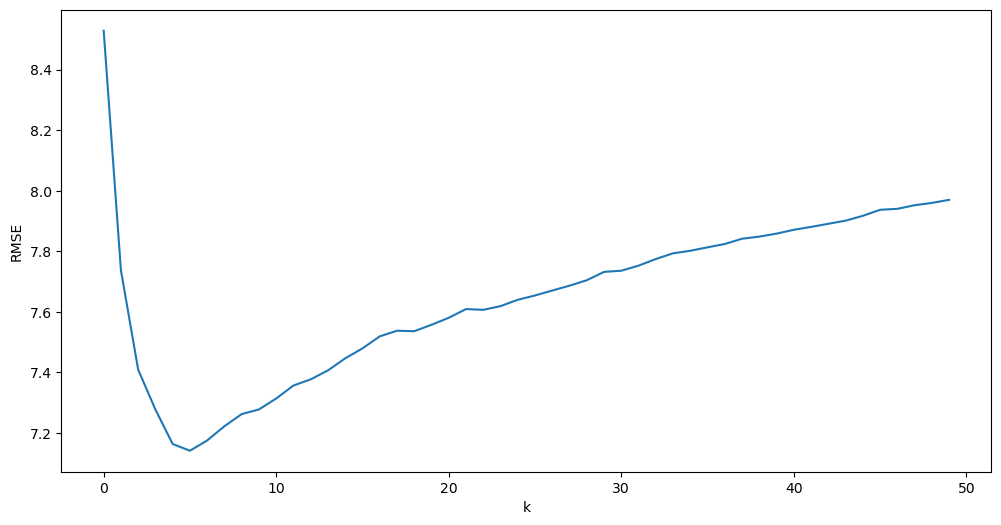

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

# Prep a list of RMSE scores
score = []

for k in range(1,51):
    # Cross validate using the appropriate parameters
    cv_score = cross_validate(KNeighborsRegressor(n_neighbors=k), X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    score.append(np.sqrt(-cv_score['test_score'].mean()))

print('Best k: ', score.index(min(score)))
print('Best score: ', np.min(score))    

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(score)
ax.set_xlabel('k')
ax.set_ylabel('RMSE');

# Exercise 4

What is the accuracy of a KNN Classifier on the biodiversity dataset? You will need to open the 'Dataset/biodiversity-prepared.csv' file and separate the features (`X`) and target (`y`; `RCACScore`). For this exercise, no need to split your dataset as we will rely on cross-validation only: use RandomizedSearchCV to find the best k, and thus the best accuracy.

**NOTE**: There is a bug with the KNN Classifier in sklearn version 1.3.0. If you get an error where all of your test scores are `nan`, use `model.fit(X.values, y)` to fix the issue (rather than `model.fit(X, y)`). 

In [15]:
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier

# Import data
data = pd.read_csv('Data/biodiversity-prepared.csv')

# X, y split
X = data.drop(columns='RCACScore')
y = data['RCACScore']

# Parameter grid
param_grid = {
        'n_neighbors': randint(low=2, high=500)
}

# Random search using the appropriate values
knn_rnd_search = RandomizedSearchCV(
    KNeighborsClassifier(), 
    param_distributions = param_grid,
    n_iter=200,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose = 5
)

# Fit this model
knn_rnd_search.fit(X.values, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228EBE9F6A0>},
                   random_state=42, scoring='accuracy', verbose=5)

In [16]:
print('Accuracy of best performing model: ', knn_rnd_search.best_score_)

Accuracy of best performing model:  0.8239298943613663


# Exercise 5

In this exercise, we are going to use PCA to extract greater performances from our models on this small dataset. First, let's see how much of the explained variance each component would get us. When you do a PCA analysis, the principal components are sorted in order of their contribution to explaining the variance of your data. Component 1 is the most important, 2 is a bit less important, etc...the `pca` object contains an attribute that contains the %-contribution that each component makes to the variability of your data.

In the first part of our exercise, we will try to plot this cumulative variance. Do the following:

* Create a new `PCA` model and fit it with the features of the biodiversity dataset (in my case this is called `X`)
* Create an empty array (a good name for it would be `explained_variance`)
* Using a loop, add the cumulative sum of the explained variance from component 1 to the last component. You will need to take the sum of each component, gradually adding more components. Save your values in the array
* Plot the % of explained variance (your array)

What do you observe?

In [17]:
from sklearn.decomposition import PCA

# Create PCA model and fit it to X
pca = PCA()
pca.fit(X)

PCA()

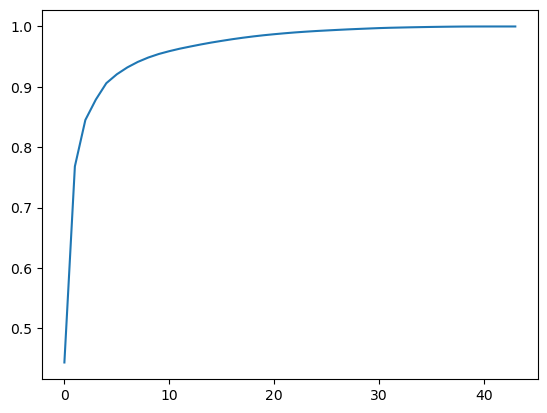

In [22]:
# We actually learned how to find cumulative sum without a loop in Lecture 2
explained_variance = pca.explained_variance_ratio_.cumsum()

# More than 90% of the variance can be explained in less than 10 components!
plt.plot(explained_variance);

### Finding the best number of component and k for our algorithm

Now let's see if PCA can help us get a few percent improvement in accuracy, using less features. Use a pipeline and `RandomizedSearchCV` to identify the best combination of `n_components` to use for our PCA object and the best value of `k` for a KNN classifier. What accuracy score do you obtain?

In [28]:
# Copy our code from above

knn_pipe = Pipeline([
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Parameter grid
param_grid = {
    'pca__n_components': randint(low=10, high=20),  # We try and find a n_components between 10 and 20 
                                                    # since 14 represents 97% of the data
    'knn__n_neighbors': randint(low=2, high=500)
}

# Random search using the appropriate values
knn_rnd_search = RandomizedSearchCV(
    knn_pipe, 
    param_distributions = param_grid,
    n_iter=200,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose = 5
)

# Fit this model
knn_rnd_search.fit(X.values, y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'knn__n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228E7F13AC0>,
                                        'pca__n_components': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000228EBE9DF90>},
                   random_state=42, scoring='accuracy', verbose=5)

In [29]:
# Very slight improvement...honestly not much better
print(knn_rnd_search.best_estimator_)
print(knn_rnd_search.best_score_)

Pipeline(steps=[('pca', PCA(n_components=17)),
                ('knn', KNeighborsClassifier(n_neighbors=10))])
0.827291695248548


### Trying the same approach with support vector machine

Now let's try to combining PCA with support vector machines and see what accuracy we can get...Are the best parameters for this model the same as for the KNN with PCA approach?

**Note**: Some combinations of SVC can take a long time to run - I recommend lowering the `n_iter` to around 20 in order to scope out the best/fastest models. Look up the `cv_results_` attribute of the `RandomizedSearchCV` object to get a breakdown of all the combinations the search attempted. **Hint**: Running `pd.DataFrame(search.cv_results_)` will automatically put all the information in a dataframe for easy reading.

In [36]:
from sklearn.svm import SVC

# Create pipeline
svr_pipe = Pipeline([
    ('pca', PCA()),
    ('svr', SVC()) # Remember to use SVC, not SVR - this is a classification problem!
])

# Set up parameter grid
param_grid = {
    'pca__n_components': [i for i in range(10,21)],
    'svr__kernel': ["linear", "rbf", "sigmoid"],    
    'svr__C': [10**i for i in range(-3, 5)] # this generates the following list: 0.001, 0.01, 0.1, ... 1000, 10000
}

# Set up the GridSearch with the SVR_pipe
pca_searcher = RandomizedSearchCV(
    svr_pipe,
    param_distributions = param_grid, 
    n_iter = 20,
    cv=5,
    scoring='accuracy',
    verbose = 5,
    n_jobs = -1,
    random_state = 42
)

pca_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA()), ('svr', SVC())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'pca__n_components': [10, 11, 12, 13,
                                                              14, 15, 16, 17,
                                                              18, 19, 20],
                                        'svr__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000, 10000],
                                        'svr__kernel': ['linear', 'rbf',
                                                        'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=5)

In [37]:
# Much better - 92% accuracy!
print(pca_searcher.best_estimator_)
print(pca_searcher.best_score_)

Pipeline(steps=[('pca', PCA(n_components=20)),
                ('svr', SVC(C=1, kernel='linear'))])
0.9249788494077833


In [38]:
# Create pipeline
svr_pipe = Pipeline([
    ('svr', SVC()) # Remember to use SVC, not SVR - this is a classification problem!
])

# Set up parameter grid
param_grid = {
    'svr__kernel': ["linear", "rbf", "sigmoid"],    
    'svr__C': [10**i for i in range(-3, 5)] # this generates the following list: 0.001, 0.01, 0.1, ... 1000, 10000
}

# Set up the GridSearch with the SVR_pipe
nonpca_searcher = RandomizedSearchCV(
    svr_pipe,
    param_distributions = param_grid, 
    n_iter = 20,
    cv=5,
    scoring='accuracy',
    verbose = 5,
    n_jobs = -1,
    random_state = 42
)

nonpca_searcher.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=Pipeline(steps=[('svr', SVC())]), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000, 10000],
                                        'svr__kernel': ['linear', 'rbf',
                                                        'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=5)

In [39]:
# % accuracy without PCA
print(nonpca_searcher.best_estimator_)
print(nonpca_searcher.best_score_)

Pipeline(steps=[('svr', SVC(C=1000, kernel='linear'))])
0.9266691818722276
